In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()

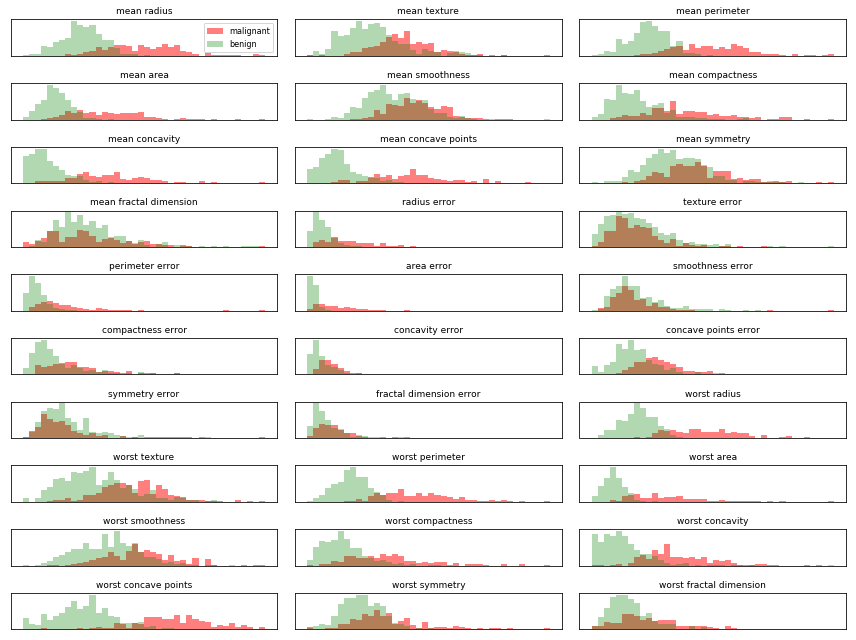

In [3]:
fig, axes = plt.subplots(10, 3, figsize=(12, 9)) 

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(10 * 3):
    _, bins = np.histogram(cancer.data[:, i], bins=40)
    
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color='g', alpha=0.3)
    ax[i].set_title(cancer.feature_names[i], fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_yticks(())
    
ax[0].legend(['malignant', 'benign'], loc='best', fontsize=8)
plt.tight_layout()
plt.show()

In [4]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cancer.data)

[  4.42720256e-01   1.89711820e-01   9.39316326e-02   6.60213492e-02
   5.49576849e-02   4.02452204e-02   2.25073371e-02   1.58872380e-02
   1.38964937e-02   1.16897819e-02   9.79718988e-03   8.70537901e-03
   8.04524987e-03   5.23365745e-03   3.13783217e-03   2.66209337e-03
   1.97996793e-03   1.75395945e-03   1.64925306e-03   1.03864675e-03
   9.99096464e-04   9.14646751e-04   8.11361259e-04   6.01833567e-04
   5.16042379e-04   2.72587995e-04   2.30015463e-04   5.29779290e-05
   2.49601032e-05   4.43482743e-06]


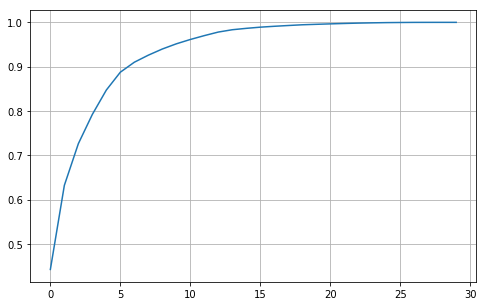

In [5]:
pca = PCA(n_components=30)
pca.fit(x_scaled)

print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [6]:
pca = PCA(n_components=3)
train_x = pca.fit_transform(x_scaled)

print(pca.explained_variance_ratio_)

[ 0.44272026  0.18971182  0.09393163]


In [7]:
ex_var = np.var(train_x, axis=0)
ex_var_ratio = ex_var / np.sum(ex_var)
print(ex_var_ratio)

[ 0.60950217  0.2611802   0.12931763]


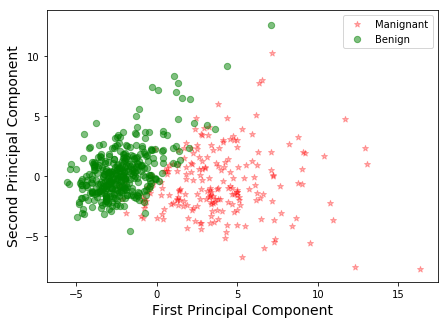

In [8]:
Xax = train_x[:, 0]
Yax = train_x[:, 1]

labels = cancer.target

c_dict = {0: 'red', 1: 'green'}
labl = {0: 'Manignant', 1: 'Benign'}
marker = {0: '*', 1: 'o'}
alpha = {0: 0.3, 1: 0.5}

fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')

for i in np.unique(labels):
    ix = np.where(labels == i)
    ax.scatter(Xax[ix], Yax[ix], c=c_dict[i], s=40,
               label=labl[i], marker=marker[i], alpha=alpha[i])
    
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.legend()
plt.show()

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


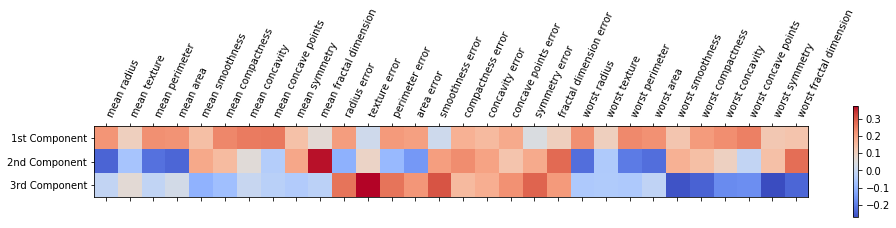

In [9]:
plt.matshow(pca.components_, cmap='coolwarm')

plt.yticks([0, 1, 2], ['1st Component', '2nd Component', '3rd Component'],
           fontsize=10)

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names,
           rotation=65, ha='left')

plt.colorbar()
plt.tight_layout()
plt.show()